In [2]:
import os
import collections
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import lib.taxonomy_tools as taxonomy_tools
import lib.common as common
common.set_environment_variable()
plt.rcParams["font.size"] = 12.5
plt.rcParams["figure.dpi"] = 400
plt.rcParams["figure.figsize"] = [4,4]

[33688, 18277, 7221, 2422, 683]


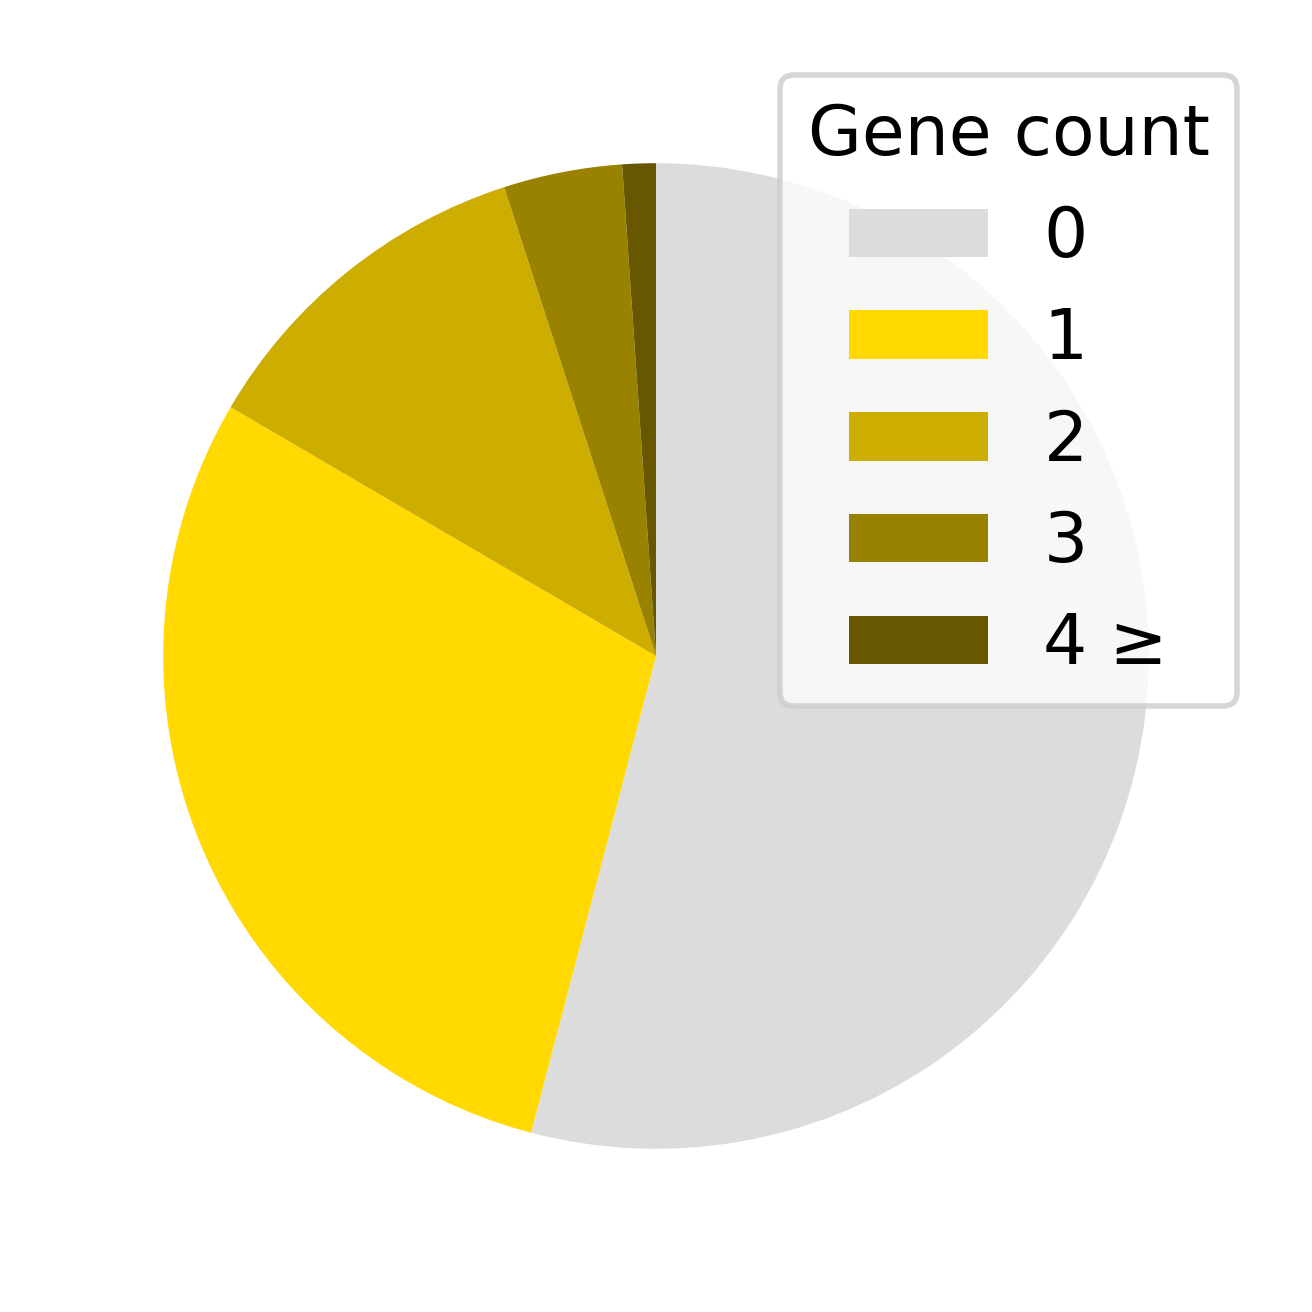

In [3]:
#fig1a bacteria
ppk2_table = pd.read_table(os.environ["Describe"])
ppk2_number_list = []
org_accession_list = taxonomy_tools.create_bac_gtdb_accession_list()
for org_accession in org_accession_list:
    if org_accession not in ppk2_table['org_accession'].values:
        ppk2_number_list.append(0)
    elif ppk2_table[ppk2_table['org_accession'] == org_accession].shape[0] > 3:
        ppk2_number_list.append(4)
    else:
        ppk2_number_list.append(ppk2_table[ppk2_table['org_accession'] == org_accession].shape[0])
        
counter = collections.Counter(ppk2_number_list)
format_ppk2_number_count_list = [counter[i] for i in range(len(counter))]
print(format_ppk2_number_count_list)
labels = ['0','1','2','3','4 ≥']
pie_color = ['#dcdcdc','#ffd900','#ccad00','#998200','#665700','#332b00','#1a1600','#000000']
plt.pie(format_ppk2_number_count_list,startangle=90,labels=labels,counterclock=False,labeldistance=None,colors=pie_color)
plt.legend(title="Gene count",loc = 'upper right') 
plt.show()

[3060, 299, 41, 11, 1]


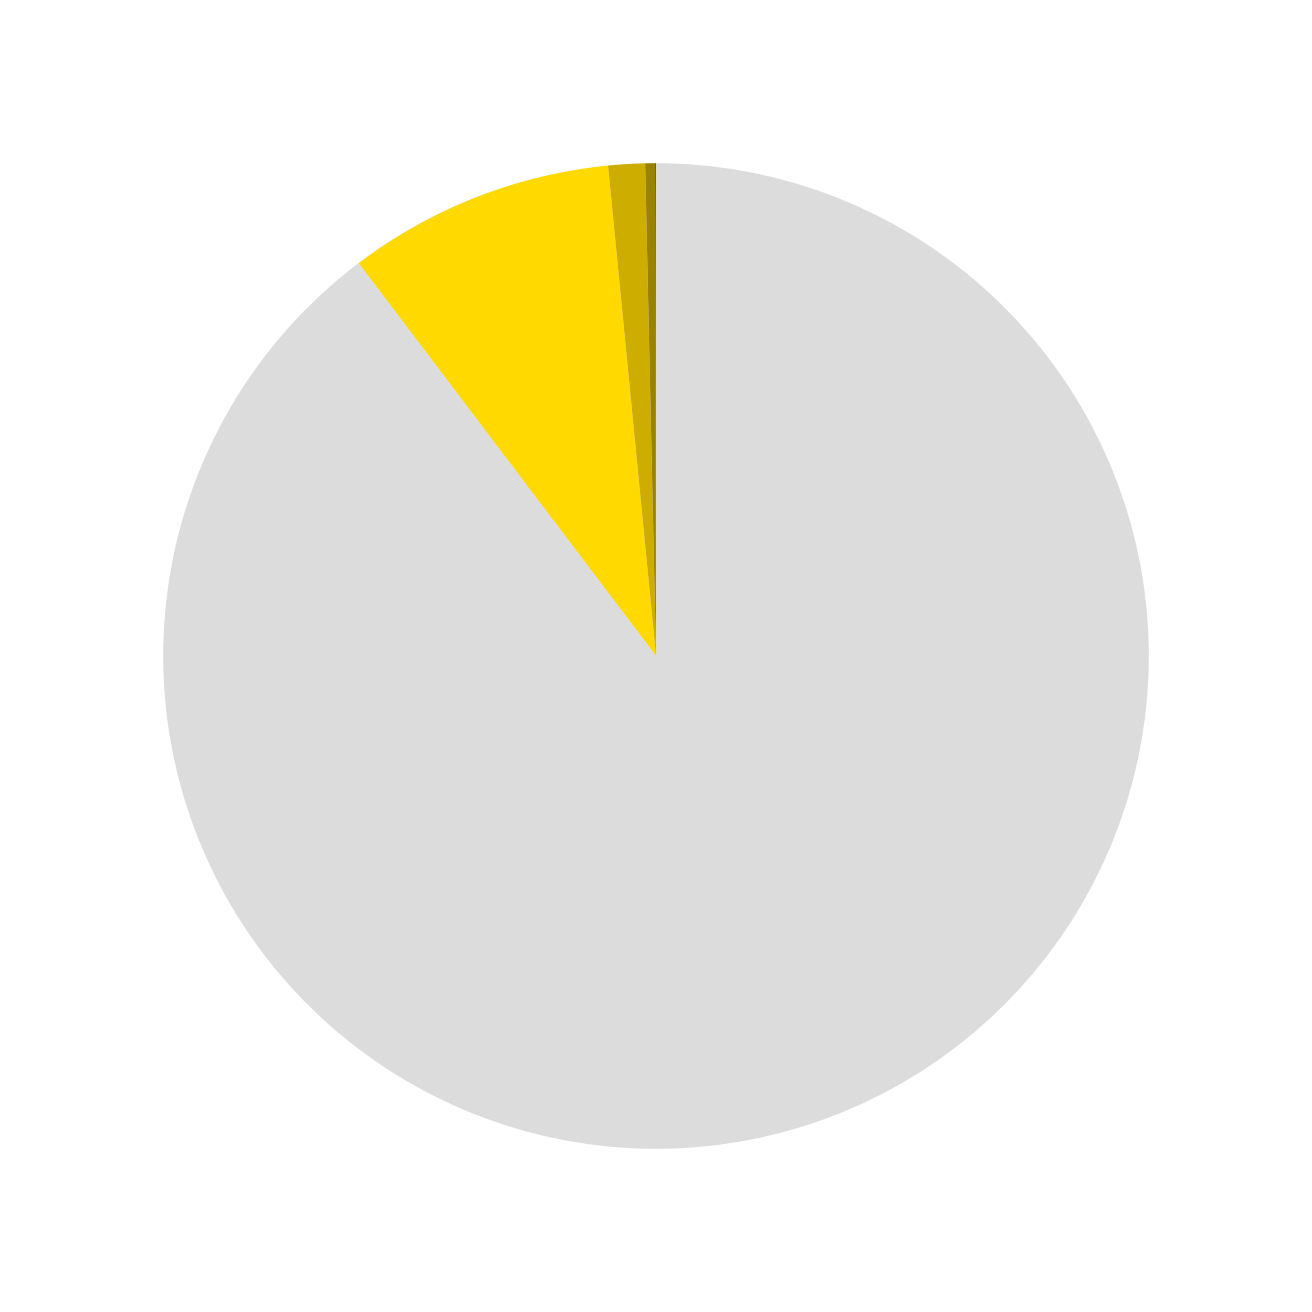

In [5]:
#fig1a archaea
ppk2_table = pd.read_table(re.sub('ppk2_bacteria_table.tsv','ppk2_archaea_table.tsv',os.environ["Describe"]))
ppk2_number_list = []
org_accession_list = taxonomy_tools.create_arc_gtdb_accession_list()

for org_accession in org_accession_list:
    if org_accession not in ppk2_table['org_accession'].values:
        ppk2_number_list.append(0)
    elif ppk2_table[ppk2_table['org_accession'] == org_accession].shape[0] > 3:
        ppk2_number_list.append(4)
    else:
        ppk2_number_list.append(ppk2_table[ppk2_table['org_accession'] == org_accession].shape[0])
        
counter = collections.Counter(ppk2_number_list)
format_ppk2_number_count_list = [counter[i] for i in range(len(counter))]
print(format_ppk2_number_count_list)
labels = ['0','1','2','3','≤ 4']
pie_color = ['#dcdcdc','#ffd900','#ccad00','#998200','#665700','#332b00','#1a1600','#000000']
plt.pie(format_ppk2_number_count_list,startangle=90,labels=labels,counterclock=False,labeldistance=None,colors=pie_color)
plt.show()

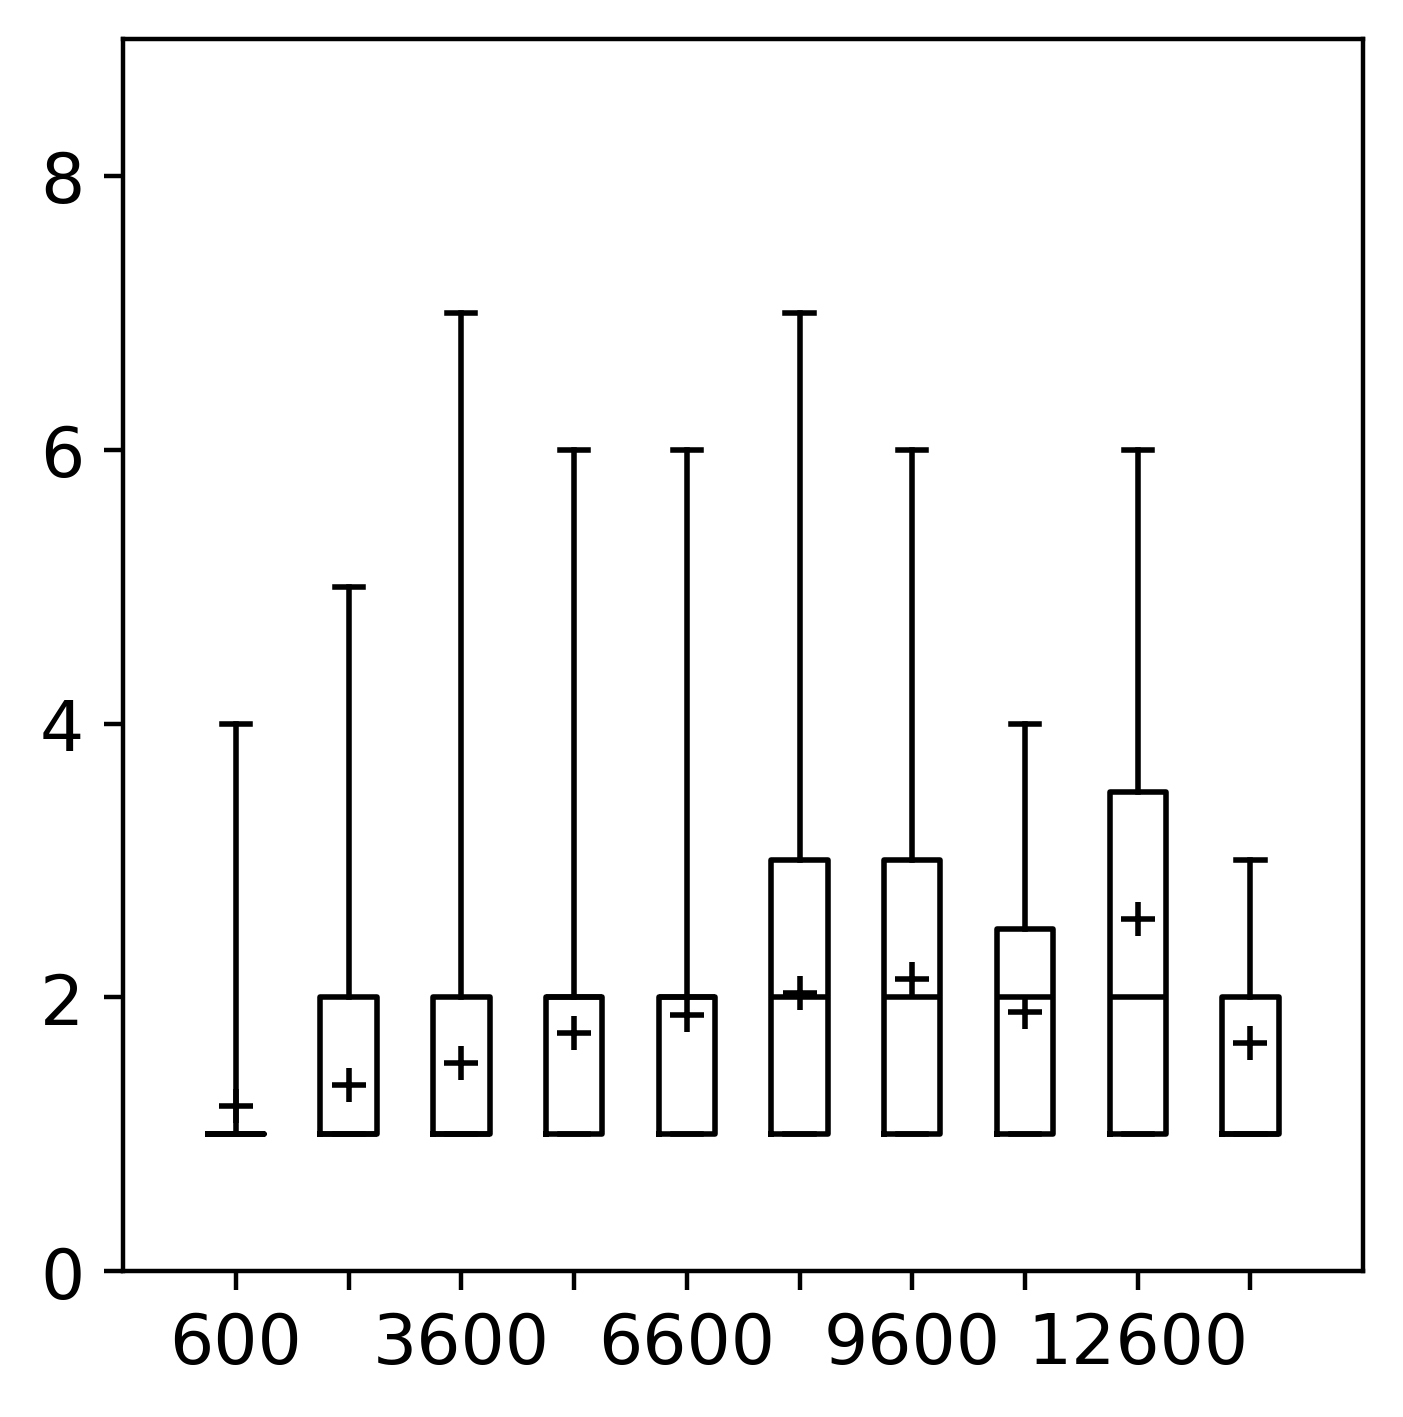

In [6]:
ppk2_table = pd.read_table(os.environ["Describe"]) 
orf_num_bin = np.linspace(600,15600,11)

orf_num_ppk2_num_dict = {}
for idx in range(len(orf_num_bin)-1):
    ppk2_num_list = []
    df_tmp = ppk2_table.query(f"{orf_num_bin[idx]} < orf_number <= {orf_num_bin[idx+1]}")
    for org_accession in list(set(df_tmp.org_accession)):
        ppk2_num_list.append(len(df_tmp[df_tmp['org_accession'] == org_accession]))
    orf_num_ppk2_num_dict[int(orf_num_bin[idx])] = ppk2_num_list

orf_num_ppk2_num_key = list(orf_num_ppk2_num_dict.keys())
orf_num_ppk2_num_key.sort()
sorted_ppk2_num_list = [orf_num_ppk2_num_dict[orf_num_bin] for orf_num_bin in orf_num_ppk2_num_key]
fig,ax =plt.subplots(1,1)
ax.boxplot(sorted_ppk2_num_list,showmeans=True,medianprops=dict(color='black'),meanprops={"marker":"+","markerfacecolor":"white", "markeredgecolor":"black"},sym="",autorange=True,whis=10)
ax.set_ylim(0, 9)
ax.set_xlim(0, 11)
xtick_label_list = []
for idx in range(len(orf_num_ppk2_num_key)):
    if idx%2 == 0:
        xtick_label_list.append(str(orf_num_ppk2_num_key[idx]))
    else:
        xtick_label_list.append("")
ax.set_xticklabels(xtick_label_list)

plt.grid(False)
plt.show()

